In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# AAPL Close Price with MA20 and MA200

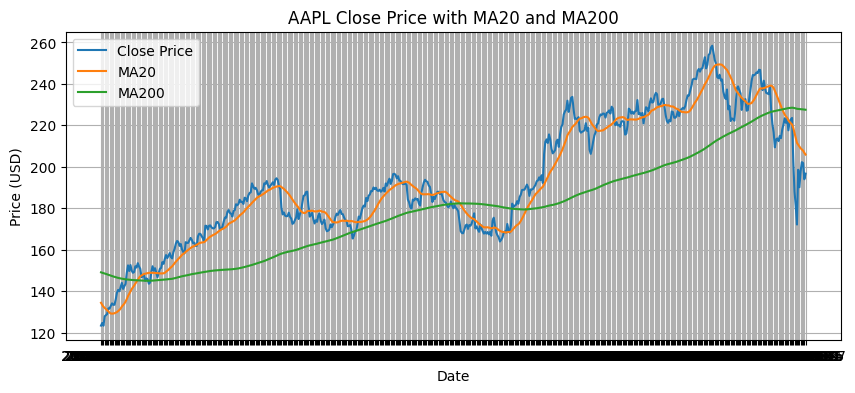

In [2]:
final_df = pd.read_csv('stocks_data_full.csv')

aapl_df = final_df[final_df['Ticker'] == 'AAPL']

plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['Date'], aapl_df['MA20'], label='MA20')
plt.plot(aapl_df['Date'], aapl_df['MA200'], label='MA200')
plt.title('AAPL Close Price with MA20 and MA200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


This plot shows the daily closing price of AAPL stock along with its 20-day and 200-day moving averages.  
It helps visualize both short-term and long-term trends in the stock's price movement.

# AAPL RSI (Relative Strength Index) Over Time

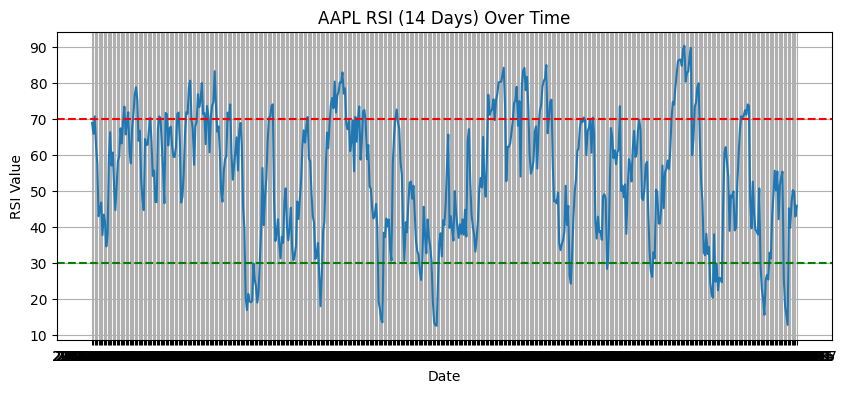

In [3]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df[28:], x='Date', y='RSI_14')
plt.title('AAPL RSI (14 Days) Over Time')
plt.axhline(70, color='red', linestyle='--')  #Overbought line
plt.axhline(30, color='green', linestyle='--')  #Oversold line
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.grid(True)
plt.show()

This chart displays the 14-day RSI values for AAPL.  
It indicates momentum and highlights periods where the stock may be overbought (RSI > 70) or oversold (RSI < 30).


# AAPL ATR (Average True Range) Over Time

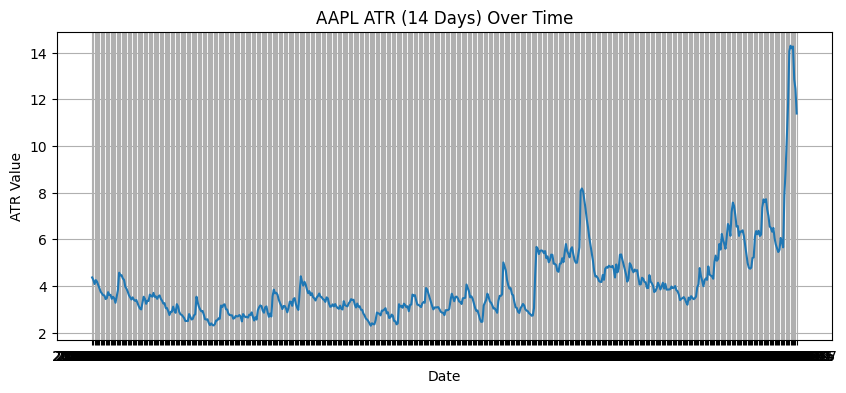

In [4]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df, x='Date', y='ATR_14')
plt.title('AAPL ATR (14 Days) Over Time')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.grid(True)
plt.show()

This plot shows the 14-day Average True Range (ATR) for AAPL.  
It measures the stock's daily volatility and helps assess the level of price fluctuations over time.

# Distribution of P/E Ratios Across Companies

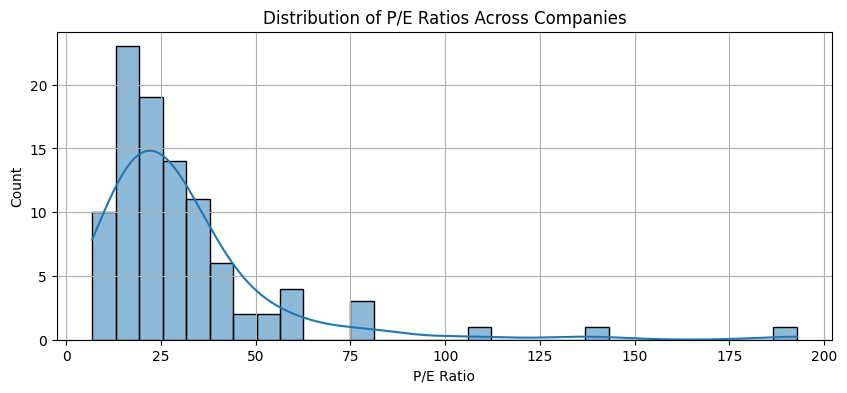

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['P/E'], bins=30, kde=True)
plt.title('Distribution of P/E Ratios Across Companies')
plt.xlabel('P/E Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This histogram illustrates the distribution of Price-to-Earnings (P/E) ratios across different companies.  
It helps identify how companies are valued relative to their earnings.


# Distribution of Market Capitalization Across Companies

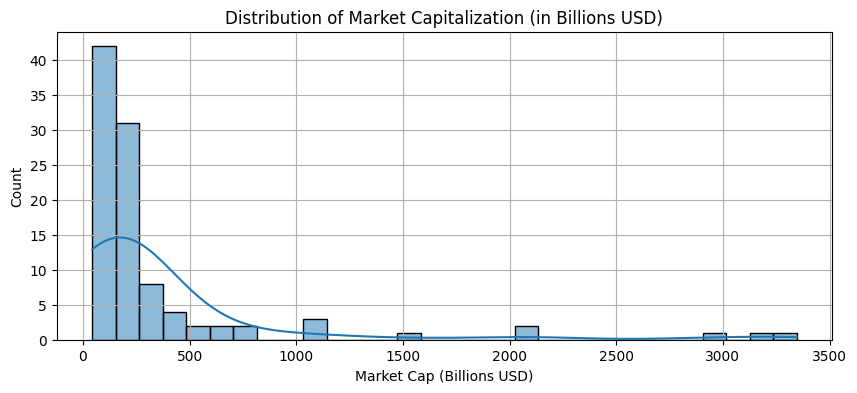

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['Market_Cap']/1e9, bins=30, kde=True)
plt.title('Distribution of Market Capitalization (in Billions USD)')
plt.xlabel('Market Cap (Billions USD)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This plot shows the spread of companies by their total market value (in billions of USD).  
It highlights the presence of small, mid-sized, and large-cap stocks in the dataset.

# Daily Return Distribution for Selected Stocks (Boxplot)

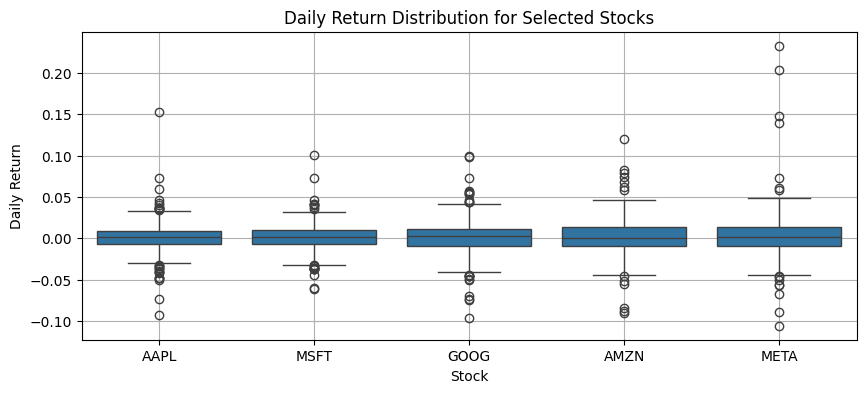

In [7]:
final_df['Daily_Return'] = final_df.groupby('Ticker')['Close'].pct_change()

sample_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']
sample_df = final_df[final_df['Ticker'].isin(sample_tickers)]

plt.figure(figsize=(10,4))
sns.boxplot(data=sample_df, x='Ticker', y='Daily_Return')
plt.title('Daily Return Distribution for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


This boxplot compares the daily returns of selected major companies.  
It helps visualize volatility, risk, and consistency in stock performance.

# AAPL Volume Traded Over Time

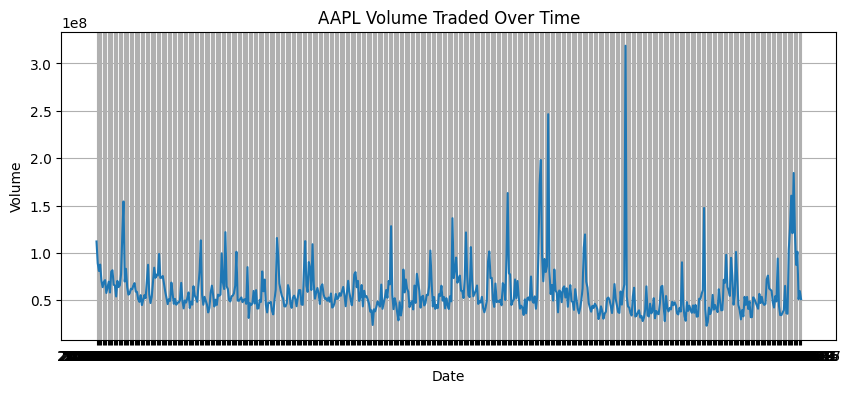

In [8]:
plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Volume'])
plt.title('AAPL Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

This plot tracks the daily trading volume of AAPL stock over time.  
It reflects investor activity and liquidity in the market.


## Correlation Heatmap of Technical Indicators (AAPL)

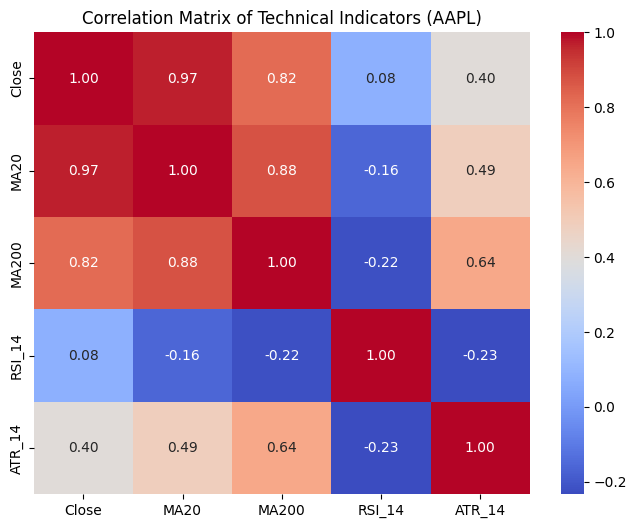

In [9]:
aapl_df = final_df[final_df['Ticker'] == 'AAPL']
features = ['Close', 'MA20', 'MA200', 'RSI_14', 'ATR_14']
correlation_matrix = aapl_df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Technical Indicators (AAPL)')
plt.show()


This heatmap shows the correlation between key technical indicators for AAPL.  
It helps identify relationships between indicators such as Moving Averages (MA20/MA200), RSI, ATR, and the stock's close price.  
For example, we expect MA20 and MA200 to be highly correlated with the closing price, while ATR and RSI capture different aspects like volatility and momentum.

## Top 10 Companies by Market Capitalization

/var/folders/n0/hbjxync51xlcp25_f3hxlgrh0000gq/T/ipykernel_92895/31889256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')


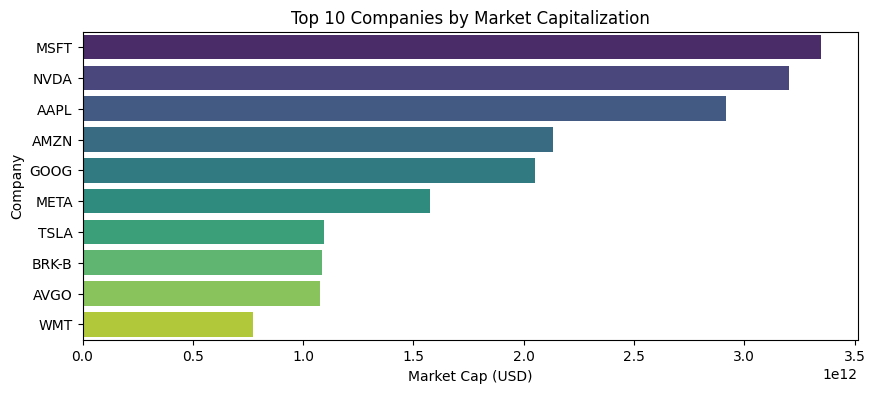

In [10]:
sorted_df = final_df.sort_values(by='Date', ascending=False)
latest_market_cap = sorted_df.drop_duplicates(subset='Ticker')[['Ticker', 'Market_Cap']]
top10 = latest_market_cap.sort_values(by='Market_Cap', ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Company')
plt.show()


This bar chart displays the ten largest companies in our dataset by market capitalization.  
It gives a sense of the relative size of each company in the stock market and shows how the dataset includes both large-cap and mid-cap stocks.

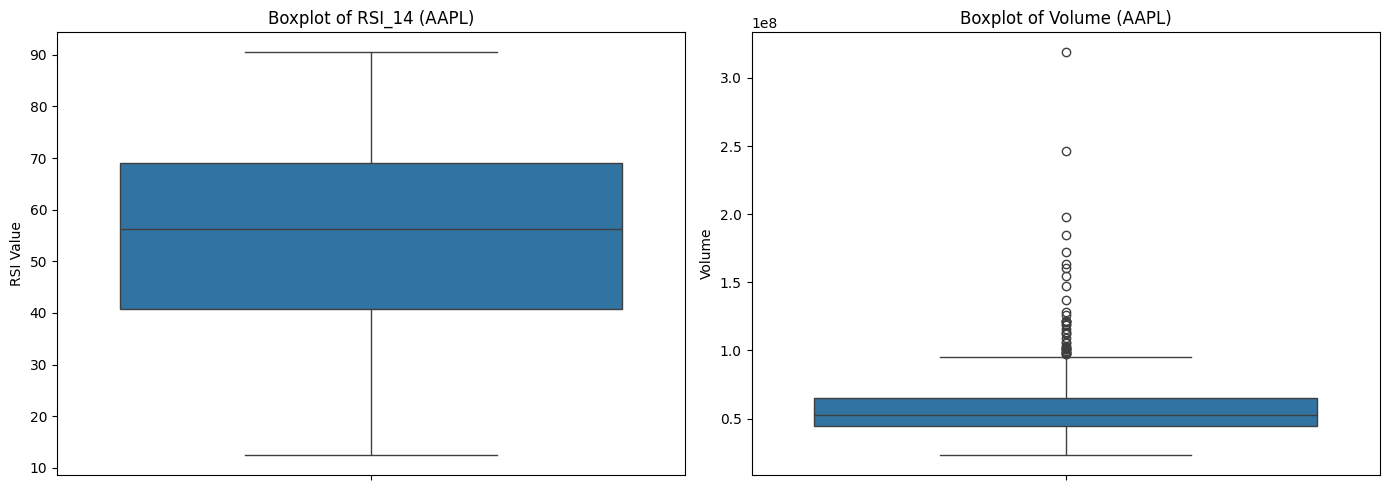

In [11]:
# Filter a specific stock to focus on (e.g., AAPL)
aapl_df = final_df[final_df['Ticker'] == 'AAPL'].dropna(subset=['RSI_14', 'Volume'])

# Plot boxplots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=aapl_df['RSI_14'])
plt.title('Boxplot of RSI_14 (AAPL)')
plt.ylabel('RSI Value')

plt.subplot(1, 2, 2)
sns.boxplot(y=aapl_df['Volume'])
plt.title('Boxplot of Volume (AAPL)')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


## Clustering Analysis

In this stage, we applied clustering techniques to uncover hidden patterns in the behavior of stocks based on their technical and fundamental indicators.  
We selected key features including **RSI (Relative Strength Index), ATR (Average True Range), MA20, MA200, P/E Ratio, and Market Capitalization**, which reflect price momentum, volatility, valuation, and trend direction.  

We standardized the data and applied three different clustering algorithms to compare their ability to separate stocks into meaningful groups:
- **KMeans**: a centroid-based method that partitions data into fixed clusters.
- **DBSCAN**: a density-based method that detects clusters of arbitrary shape and identifies noise/outliers.
- **Agglomerative Clustering**: a hierarchical method that builds a tree of clusters from bottom-up.

These methods allow us to identify distinct stock behaviors and group similar assets together. The resulting clusters can support investment strategies and will later assist in building a predictive model for stock movements.


In [12]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select relevant features
features = ['RSI_14', 'ATR_14', 'MA20', 'MA200', 'P/E', 'Market_Cap']

# Full dataset (all rows, e.g., daily data) — used for KMeans and DBSCAN
X = final_df.dropna(subset=features)[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduced dataset — one row per stock, used for Agglomerative Clustering
X_reduced = final_df.dropna(subset=features).drop_duplicates(subset='Ticker')[features]
X_scaled_reduced = scaler.fit_transform(X_reduced)


## Clustering Method 1 – KMeans

KMeans is a centroid-based clustering algorithm that divides the data into a predefined number of clusters (k) by minimizing the variance within each cluster.  
It assumes spherical clusters and works well when clusters are compact and well-separated.


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
X['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

## Clustering Method 2 – DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed.  
It can detect arbitrarily shaped clusters and identify outliers as noise.  
No need to define the number of clusters in advance.


In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
X['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


## Clustering Method 3 – Agglomerative (Hierarchical)

Agglomerative clustering is a bottom-up hierarchical method that starts with each data point as a separate cluster and merges them step by step.  
It builds a dendrogram and forms final clusters by cutting the tree at a specified level (number of clusters).


In [15]:
from sklearn.cluster import AgglomerativeClustering

# Use reduced dataset: one row per ticker
agglo = AgglomerativeClustering(n_clusters=3)
X_reduced['Agglomerative_Cluster'] = agglo.fit_predict(X_scaled_reduced)

# Display results
X_reduced[['RSI_14', 'ATR_14', 'Agglomerative_Cluster']].head(10)


,RSI_14,ATR_14,Agglomerative_Cluster
0,27.505,4.368,2
575,44.730,6.304,2
1150,46.947,2.569,2
1725,49.307,2.755,2
2300,67.843,4.456,2
2875,23.299,10.718,0
3450,31.615,0.726,2
4025,59.146,5.501,2
4600,49.430,3.851,0
5175,68.998,2.202,0


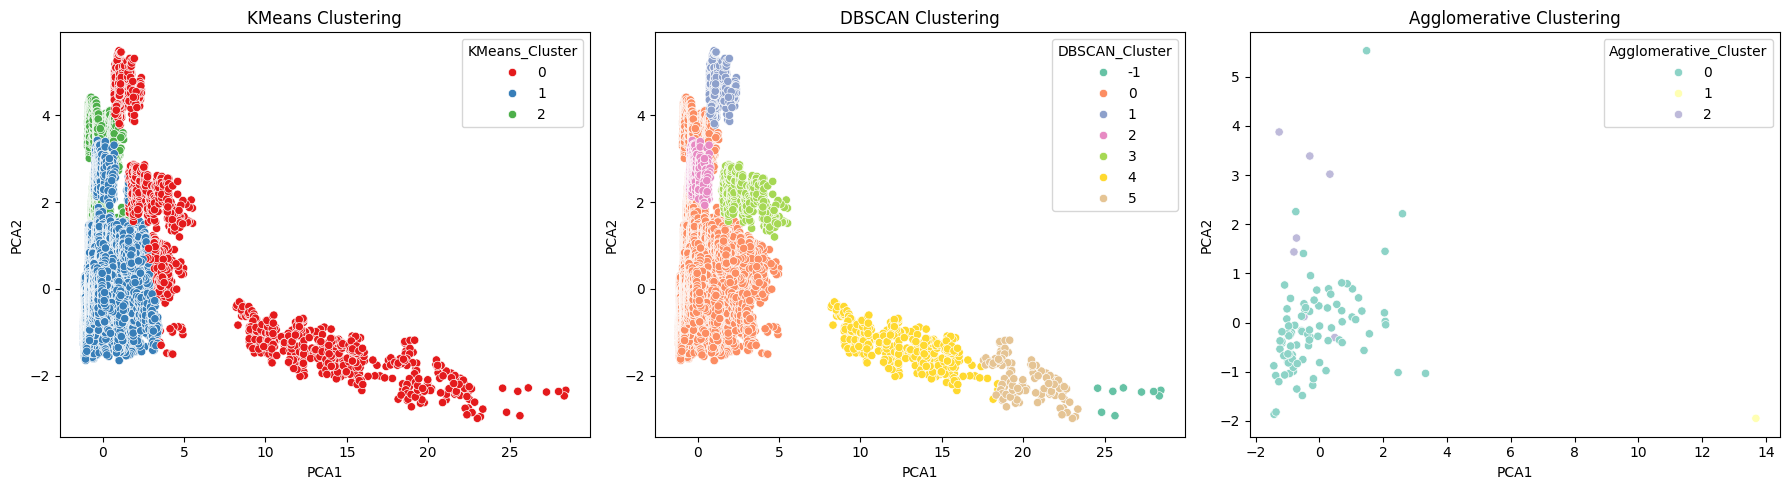

In [16]:
from sklearn.decomposition import PCA

# PCA on full dataset (used for KMeans & DBSCAN)
pca_full = PCA(n_components=2)
pca_result_full = pca_full.fit_transform(X_scaled)
X['PCA1'] = pca_result_full[:, 0]
X['PCA2'] = pca_result_full[:, 1]

# PCA on reduced dataset (used for Agglomerative)
pca_reduced = PCA(n_components=2)
pca_result_reduced = pca_reduced.fit_transform(X_scaled_reduced)
X_reduced['PCA1'] = pca_result_reduced[:, 0]
X_reduced['PCA2'] = pca_result_reduced[:, 1]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1', ax=axes[0])
axes[0].set_title('KMeans Clustering')

sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

sns.scatterplot(data=X_reduced, x='PCA1', y='PCA2', hue='Agglomerative_Cluster', palette='Set3', ax=axes[2])
axes[2].set_title('Agglomerative Clustering')

plt.tight_layout()
plt.show()


## Clustering Insights

Based on the three PCA visualizations (KMeans, DBSCAN, Agglomerative) and the cluster feature averages, we draw the following conclusions:

1. **KMeans**  
   - Divides stocks into three roughly spherical groups.  
   - **Cluster 0 (red)**: Stocks with the highest MA20/MA200 and Market Cap.  
   - **Cluster 1 (blue)**: Mid-range stocks across momentum, volatility, and valuation.  
   - **Cluster 2 (green)**: Highly volatile stocks (high ATR) or those with extreme momentum (high/low RSI).

2. **DBSCAN**  
   - Captures arbitrarily shaped clusters and flags outliers as noise (–1).  
   - **Cluster 2 (pink)**: Stocks with strong momentum (high RSI) but low volatility.  
   - **Cluster 3 (green)**: Stocks with high moving averages but lower RSI.  
   - **Noise (–1)**: Stocks that did not belong to any dense region at the chosen ε/min_samples.

3. **Agglomerative (Hierarchical)**  
   - Operates on one “snapshot” per ticker, merging stocks bottom-up.  
   - **Cluster 1 (yellow)**: “Extreme” stocks with the highest overall feature values (momentum or market cap).  
   - **Cluster 0 (teal)**: Core group of mid-range stocks by both technical and fundamental metrics.  
   - **Cluster 2 (purple)**: A small set of unique cases (e.g., very low ATR or very low RSI).

---

**Key Takeaway**  
All three methods reveal meaningful stock groupings based on both technical (RSI, ATR, MA) and fundamental (P/E, Market Cap) indicators.  
- Used **DBSCAN** to surface complex cluster shapes and outliers.  
- Used **Agglomerative** on reduced data for clear, interpretable groups.  
- Used **KMeans** for balanced partitioning, at the risk of mixing edge cases.

Next, we will incorporate the cluster labels as a feature in our time series forecasting model for stock price prediction.  


## Step 3: Time Series Forecasting – Predicting AAPL Close Price
We use historical features and a linear regression model to forecast the next day's closing price for Apple (AAPL). The results below compare the model's predictions to actual values.


In [17]:
from sklearn.cluster import KMeans
features_for_cluster = ['RSI_14', 'ATR_14', 'MA20', 'MA200', 'P/E', 'Market_Cap']
df_cluster = final_df.dropna(subset=features_for_cluster).copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_cluster[features_for_cluster])
final_df = final_df.merge(
    df_cluster[['Date', 'Ticker', 'KMeans_Cluster']],
    on=['Date', 'Ticker'],
    how='left',
    suffixes=('', '_CLUSTER')
)
if 'KMeans_Cluster_CLUSTER' in final_df.columns:
    final_df.rename(columns={'KMeans_Cluster_CLUSTER': 'KMeans_Cluster'}, inplace=True)


#### Adding the KMeans_Cluster Feature

We applied KMeans clustering to assign each stock record to a cluster based on its technical and fundamental indicators.  
The resulting `KMeans_Cluster` label is added to the dataset as a new feature.  
This feature can help our forecasting model capture underlying stock behavior patterns and segment the data more effectively, potentially improving prediction accuracy.


#### Prepare AAPL data, split to train/test, train the model and predict


In [18]:
from sklearn.linear_model import LinearRegression

ticker = 'AAPL'
stock_df = final_df[final_df['Ticker'] == ticker].copy()
stock_df = stock_df.sort_values('Date')
stock_df['Target_Close'] = stock_df['Close'].shift(-1)

features = ['Close', 'RSI_14', 'ATR_14', 'MA20', 'MA200', 'P/E', 'Market_Cap'] 
model_df = stock_df[features + ['Target_Close']].dropna()

split_index = int(0.8 * len(model_df))
train = model_df.iloc[:split_index]
test = model_df.iloc[split_index:]


X_train = train[features]
y_train = train['Target_Close']

X_test = test[features]
y_test = test['Target_Close']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
test = test.copy()
test['Pred_Close'] = y_pred

#### Model Performance Metrics


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")


NameError: name 'np' is not defined

#### Actual vs Predicted Close Price (AAPL)


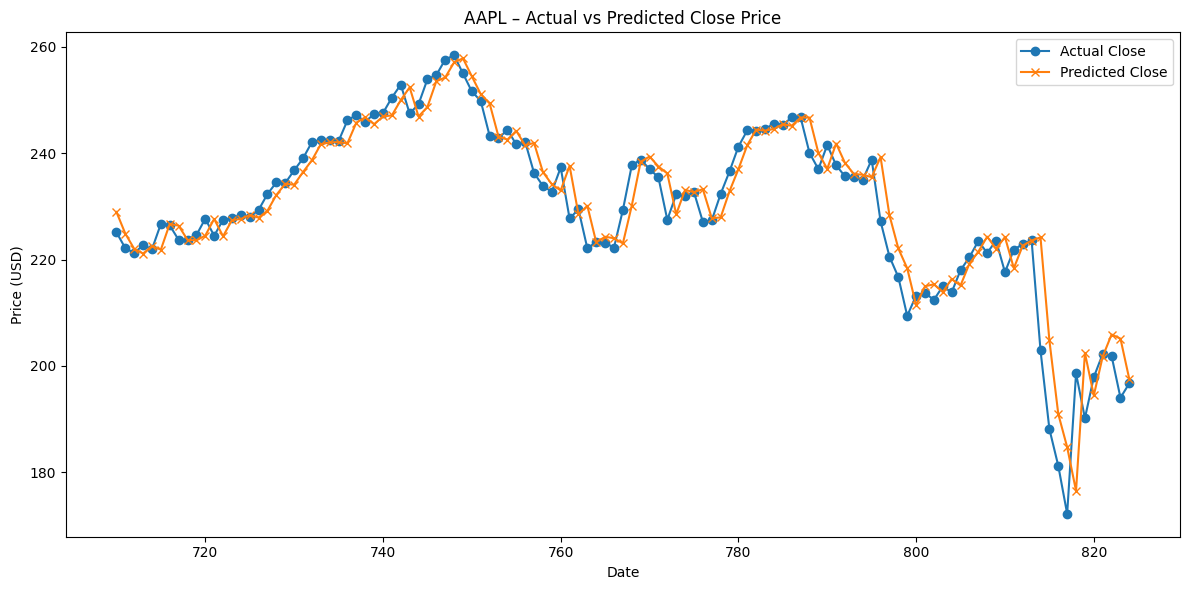

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label='Actual Close', marker='o')
plt.plot(test.index, y_pred, label='Predicted Close', marker='x')
plt.title('AAPL – Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


## **Actual vs Predicted Close Price (AAPL)**

The chart above shows a comparison between the **actual closing prices** of Apple (AAPL) and the **predicted prices** from our linear regression model.

**Main Insights:**
- The **model predictions** (orange line) generally follow the main trends of the real prices (blue line).
- **Most movements** are captured, but some **sharp changes** and market fluctuations are not fully predicted.
- This demonstrates that while a simple linear model is useful for basic forecasting, **it is not accurate enough for real trading** and should be improved with more advanced methods.

